<img src="img/logo.png">

# Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mylib.fonction_exploration import exploration
from mylib.fonction_pk import test_pk
from mylib.fonction_merge import df_merge
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns
from pandas_profiling import ProfileReport

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
red = "\033[31m"
end = "\033[0;0m"

chemin_cust = 'src/customers.csv'
chemin_prod = 'src/products.csv'
chemin_tran = 'src/transactions.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement des fichiers

In [2]:
customers = pd.read_csv(chemin_cust)
products = pd.read_csv(chemin_prod)
transactions = pd.read_csv(chemin_tran)

# **Customers**

## Vérification de l'unicité d'écriture des "client_id"

In [3]:
before = customers[customers['client_id'].str.contains("c_") == False]
print(bold + red + f"\nAvant nettoyage, le fichier contient {len(before)} erreurs d'unicité d'écriture :" + end)
before


Avant nettoyage, le fichier contient 2 erreurs d'unicité d'écriture :


,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [4]:
# après analyse du fichier "transactions" dans la section 5.1 on peut voir que 
# ct_0 et ct_1 correspondent aux clients test, non pertinents pour l'analyse
# donc suppression de ct_0 et ct_1

customers = customers.drop(index=[2735, 8494])
after = customers[customers['client_id'].str.contains("c_") == False]
print(bold + red + f"\nAprès nettoyage, le fichier contient {len(after)} erreurs d'unicité d'écriture :" + end)
after


Après nettoyage, le fichier contient 0 erreurs d'unicité d'écriture :


,client_id,sex,birth


## Vérification des outliers

In [5]:
z = stats.zscore(customers["birth"])
outlier_customers = customers[z > 1.96]
nb_outlier_z = len(outlier_customers)
print(bold + red + f"\n{nb_outlier_z} produits sont concernés par un z-score > 1,96" + end)
print(bold + red + "Il n'y a donc pas d'outliers")


0 produits sont concernés par un z-score > 1,96
Il n'y a donc pas d'outliers


## Distribution des valeurs

<AxesSubplot: >

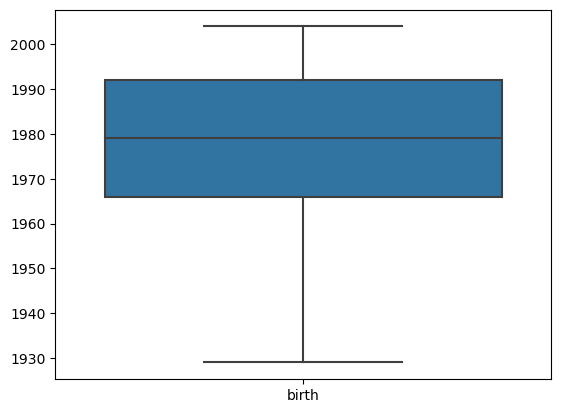

In [6]:
sns.boxplot(data=customers)

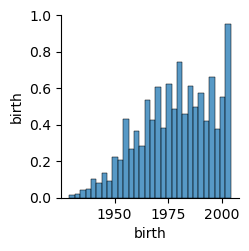

In [7]:
sns.pairplot(customers)

## Au vue des futures jointures vérification de la clé primaire

In [8]:
test_pk(customers, 'client_id')

La clé est unique


# **Products**

## Vérification de l'unicité d'écriture des "id_prod"

In [9]:
# après analyse de la table "transactions" dans la section 5.1 on peut voir la 
# présence d'un produit test référencé 'T_0', vérification de sa présence dans 
# la table "products"

before = products[products['id_prod'].str.contains("T_0")]
print(bold + red + f"\nAvant nettoyage, le fichier contient {len(before)} erreur d'unicité d'écriture :" + end)
before


Avant nettoyage, le fichier contient 1 erreur d'unicité d'écriture :


,id_prod,price,categ
731,T_0,-1.0,0


In [10]:
# T_0 correspondant au produit test, de plus avec un prix négatif, 
# il n'est pas pertinent pour l'analyse
# donc suppression de T_0

products = products.drop(index=731)
after = products[products['id_prod'].str.contains("T_O")]
print(bold + red + f"\nAprès nettoyage, le fichier contient {len(after)} erreur d'unicité d'écriture :" + end)
after


Après nettoyage, le fichier contient 0 erreur d'unicité d'écriture :


,id_prod,price,categ


## Vérification des outliers

In [11]:
products.sort_values(by='price', inplace=True)
z = stats.zscore(products["price"])
outlier_z = products[z > 1.96]
nb_outlier_z = len(outlier_z)
print(bold + red + f"\n{nb_outlier_z} produits sont concernés par un z-score > 1,96 :" + end)
outlier_z


162 produits sont concernés par un z-score > 1,96 :


,id_prod,price,categ
1814,2_229,80.99,2
1076,2_197,80.99,2
824,1_13,80.99,1
1243,2_149,80.99,2
1890,2_234,81.19,2
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


## Distribution des valeurs

<AxesSubplot: xlabel='categ', ylabel='price'>

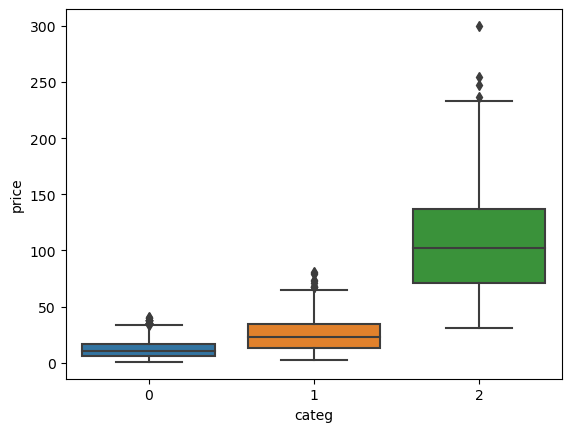

In [12]:
sns.boxplot(x='categ', y='price', data=products)

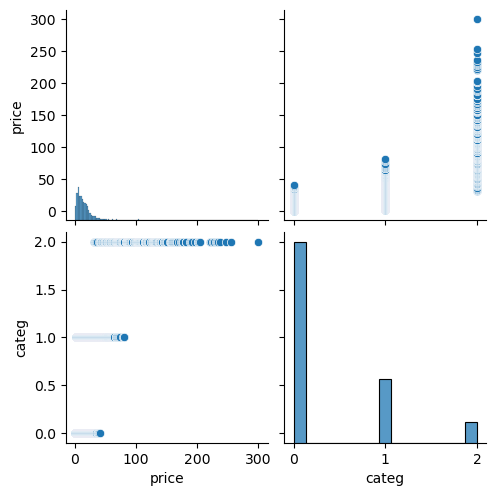

In [13]:
sns.pairplot(products)

## Au vue des futures jointures vérification de la clé primaire

In [14]:
test_pk(products, 'id_prod')

La clé est unique


# **Transactions**

## Affichage des doublons

In [15]:
duplicates_before = transactions.duplicated().sum()
print(bold + red + f"\nAu départ, le fichier contient les {duplicates_before} doublons suivants :" + end)
transactions[transactions.duplicated()]


Au départ, le fichier contient les 126 doublons suivants :


,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [16]:
# On remarque que les doublons concernent des produits test, nous affichons leur nombre total
before = transactions[transactions['id_prod'].str.contains("T_0")]
print(bold + red +
      f"\nAvant nettoyage, la table contient {len(before)} lignes avec des erreurs d'unicité d'écriture sur {len(transactions)} lignes :" + end)
before


Avant nettoyage, la table contient 200 lignes avec des erreurs d'unicité d'écriture sur 679532 lignes :


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [17]:
# Ils ne sont pas pertinents pour l'analyse donc suppression
transactions = transactions[transactions['id_prod'].str.contains("T_0") == False]
print(bold + red +
      f"\nAprès nettoyage, la table ne contient plus d'erreurs d'unicité d'écriture et se compose de {len(transactions)} lignes :" + end)
transactions[transactions['id_prod'].str.contains("T_0")]


Après nettoyage, la table ne contient plus d'erreurs d'unicité d'écriture et se compose de 679332 lignes :


,id_prod,date,session_id,client_id


In [18]:
duplicates_before = transactions.duplicated().sum()
print(bold + red + f"\nAprès nettoyage, le fichier contient {duplicates_before} doublon :" + end)
transactions[transactions.duplicated()]


Après nettoyage, le fichier contient 0 doublon :


,id_prod,date,session_id,client_id


## Changement de format vers datetime

In [19]:
transactions = transactions[transactions['date'].str.contains("test") == False]
# autre écriture possible : transactions = transactions[~transactions['date'].str.contains("test")]

In [20]:
# transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d')
transactions['date'] = pd.to_datetime(transactions['date'])
#transactions['date'] = transactions['date'].dt.strftime('%Y-%m-%d')
#transactions['date'] = pd.to_datetime(transactions['date'])
transactions.dtypes # vérification des formats après modification

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

# **Jointures**

## Jointure entre customers et transactions => cust_tran

In [21]:
df_merge(customers, transactions, 'client_id')

Le DataFrame contient 679353 lignes

La proportion de 'both' est de 99.997 % soit 679332 lignes
La proportion de 'left_only' est de 0.003 % 21 lignes
La proportion de 'right_only' est de 0.0 % 0 lignes

Aperçu des données selon les jointures 'both', 'left_only' ou 'right_only' :


(  client_id sex  birth id_prod                       date session_id _merge
 0    c_4410   f   1967  0_1316 2021-12-29 09:11:18.860592   s_141762   both
 1    c_4410   f   1967   1_385 2021-03-22 01:40:22.782925     s_9707   both
 2    c_4410   f   1967   1_190 2021-11-12 18:11:43.280574   s_118628   both
 3    c_4410   f   1967  0_1455 2021-03-22 14:29:25.189266     s_9942   both
 4    c_4410   f   1967   1_483 2022-03-13 21:35:55.949042   s_178686   both,
        client_id sex  birth id_prod date session_id     _merge
 59493     c_8253   f   2001     NaN  NaT        NaN  left_only
 200286    c_3789   f   1997     NaN  NaT        NaN  left_only
 218173    c_4406   f   1998     NaN  NaT        NaN  left_only
 220388    c_2706   f   1967     NaN  NaT        NaN  left_only
 225538    c_3443   m   1959     NaN  NaT        NaN  left_only,
 Empty DataFrame
 Columns: [client_id, sex, birth, id_prod, date, session_id, _merge]
 Index: [])

In [22]:
# Pour information
cust_tran = customers.merge(transactions, on='client_id', how='outer', indicator=True)
cust_tran_left = cust_tran[cust_tran['_merge'] == 'left_only']
print(bold + red + f"\n{len(cust_tran_left)} identifiants clients de la table CUSTOMERS n'ont pas de correspondances dans la table TRANSACTIONS.\nCes clients n'ont jamais passé de commandes :" + end)
cust_tran_left


21 identifiants clients de la table CUSTOMERS n'ont pas de correspondances dans la table TRANSACTIONS.
Ces clients n'ont jamais passé de commandes :


,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,NaN,NaT,NaN,left_only
200286,c_3789,f,1997,NaN,NaT,NaN,left_only
218173,c_4406,f,1998,NaN,NaT,NaN,left_only
220388,c_2706,f,1967,NaN,NaT,NaN,left_only
225538,c_3443,m,1959,NaN,NaT,NaN,left_only
248409,c_4447,m,1956,NaN,NaT,NaN,left_only
248965,c_3017,f,1992,NaN,NaT,NaN,left_only
261024,c_4086,f,1992,NaN,NaT,NaN,left_only
313133,c_6930,m,2004,NaN,NaT,NaN,left_only
319727,c_4358,m,1999,NaN,NaT,NaN,left_only


In [23]:
# Création de la jointure pour l'analyse
cust_tran = cust_tran[cust_tran['_merge'] == 'both']
cust_tran = cust_tran.drop(columns='_merge')
cust_tran.head()

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686


## Jointure finale entre products et cust_tran => cust_prod_tran

In [24]:
df_merge(products, cust_tran, 'id_prod')

Le DataFrame contient 679353 lignes

La proportion de 'both' est de 99.964 % soit 679111 lignes
La proportion de 'left_only' est de 0.003 % 21 lignes
La proportion de 'right_only' est de 0.033 % 221 lignes

Aperçu des données selon les jointures 'both', 'left_only' ou 'right_only' :


(  id_prod  price  categ client_id sex   birth                       date  \
 0   0_528   0.62    0.0    c_6534   f  1999.0 2021-10-03 06:32:48.512716   
 1   0_528   0.62    0.0    c_7075   m  1988.0 2021-06-20 20:31:40.948364   
 2   0_528   0.62    0.0    c_7075   m  1988.0 2022-06-20 20:31:40.948364   
 3   0_528   0.62    0.0    c_5636   f  1989.0 2021-06-24 18:55:00.312636   
 4   0_528   0.62    0.0    c_4951   m  1984.0 2021-10-14 11:22:30.187048   
 
   session_id _merge  
 0    s_99272   both  
 1    s_51439   both  
 2   s_226722   both  
 3    s_53240   both  
 4   s_104606   both  ,
      id_prod  price  categ client_id  sex  birth date session_id     _merge
 38    0_1620   0.80    0.0       NaN  NaN    NaN  NaT        NaN  left_only
 256   0_1014   1.15    0.0       NaN  NaN    NaN  NaT        NaN  left_only
 414   0_1780   1.67    0.0       NaN  NaN    NaN  NaT        NaN  left_only
 554    0_310   1.94    0.0       NaN  NaN    NaN  NaT        NaN  left_only
 1688   0_32

In [25]:
# Pour information
cust_prod_tran = products.merge(cust_tran, on='id_prod', how='outer', indicator=True)
cust_prod_tran_left = cust_prod_tran[cust_prod_tran['_merge'] == 'left_only']
print(bold + red + f"\n{len(cust_prod_tran_left)} identifiants produits de la table PRODUCTS n'ont pas de correspondances dans la table TRANSACTIONS.\nCes produits n'ont jamais été achetés :" + end)
cust_prod_tran_left


21 identifiants produits de la table PRODUCTS n'ont pas de correspondances dans la table TRANSACTIONS.
Ces produits n'ont jamais été achetés :


,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
38,0_1620,0.80,0.0,NaN,NaN,NaN,NaT,NaN,left_only
256,0_1014,1.15,0.0,NaN,NaN,NaN,NaT,NaN,left_only
414,0_1780,1.67,0.0,NaN,NaN,NaN,NaT,NaN,left_only
554,0_310,1.94,0.0,NaN,NaN,NaN,NaT,NaN,left_only
1688,0_322,2.99,0.0,NaN,NaN,NaN,NaT,NaN,left_only
1828,0_1645,2.99,0.0,NaN,NaN,NaN,NaT,NaN,left_only
2503,0_1119,2.99,0.0,NaN,NaN,NaN,NaT,NaN,left_only
534485,0_1062,20.08,0.0,NaN,NaN,NaN,NaT,NaN,left_only
534515,0_2308,20.28,0.0,NaN,NaN,NaN,NaT,NaN,left_only
536497,0_1318,20.92,0.0,NaN,NaN,NaN,NaT,NaN,left_only


### Détection de produits vendus non référencés dans la table PRODUCTS

In [26]:
cust_prod_tran_right = cust_prod_tran[cust_prod_tran['_merge'] == 'right_only']
print(bold + red + f"\nL'identifiant produit '0_2245' de la table TRANSACTIONS n'est pas référencé dans la table PRODUCTS :" + end)
cust_prod_tran_right


L'identifiant produit '0_2245' de la table TRANSACTIONS n'est pas référencé dans la table PRODUCTS :


,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
679132,0_2245,NaN,NaN,c_4505,m,1976.0,2022-01-09 09:23:31.000720,s_147220,right_only
679133,0_2245,NaN,NaN,c_4505,m,1976.0,2022-11-09 09:23:31.000720,s_295013,right_only
679134,0_2245,NaN,NaN,c_3468,f,1981.0,2021-09-11 10:52:05.205583,s_88251,right_only
679135,0_2245,NaN,NaN,c_3468,f,1981.0,2022-05-11 10:52:05.205583,s_206902,right_only
679136,0_2245,NaN,NaN,c_1403,f,1978.0,2022-09-15 14:26:50.187952,s_268455,right_only
...,...,...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,c_4283,f,1976.0,2022-08-01 02:46:38.931757,s_246657,right_only
679349,0_2245,NaN,NaN,c_4283,f,1976.0,2021-09-01 02:46:38.931757,s_83377,right_only
679350,0_2245,NaN,NaN,c_6236,f,1976.0,2022-02-25 00:08:08.736068,s_170426,right_only
679351,0_2245,NaN,NaN,c_4453,m,1981.0,2022-02-16 11:35:20.319501,s_166050,right_only


<span style="color:red">**Nous allons mettre à jour le référencement du produit '0_2245'**</span>


<span style="color:red">**=> Son identifiant produit commençant par '0_', il nous indique qu'il appartient à la catégorie 0**</span>

#### Vérification des outliers de la catégorie 0 

In [27]:
# vérification du z-score en vue du choix de méthode pour référencer le produit manquant
products_cat0 = products[products['categ'] == 0]
products_cat0.sort_values(by=['price'], inplace=True)
z = stats.zscore(products_cat0['price'])
outlier_z = products_cat0[z > 1.96]
nb_outlier_z = len(outlier_z)
print(bold + red + f"\n{nb_outlier_z} produits sont concernés par un z-score > 1,96 soit {round(float(nb_outlier_z / len(products_cat0)) * 100, 2)} % des observations :" + end)
outlier_z.head()


106 produits sont concernés par un z-score > 1,96 soit 4.59 % des observations :


,id_prod,price,categ
1209,0_1006,26.64,0
15,0_1232,26.65,0
2228,0_1492,26.65,0
2076,0_716,26.69,0
277,0_1148,26.77,0


#### Misa à jour du référencement du produit '0_2245'

In [28]:
# Remplacement des NaN dans "categ" par 0
cust_prod_tran['categ'] = cust_prod_tran['categ'].fillna(0)

# Affichage de la médiane des prix par catégorie (la catégorie 'O' étant affectée par les outliers)
print(bold + red + f"\nLa médiane des prix par catégorie est de :\n" + end)
print(products.groupby('categ').median())

# Remplacement des NaN dans "price" par la moyenne des prix de la catégorie 0
cust_prod_tran['price'] = cust_prod_tran['price'].fillna(10.32)

# Affichage de l'identifiant '0_2245' après nettoyage
cust_prod_tran_right = cust_prod_tran[cust_prod_tran['id_prod'] == '0_2245']
print(bold + red + f"\n\nAprès nettoyage, l'identifiant '0_2245' a été référencé dans la jointure tel que :" + end)
cust_prod_tran_right


La médiane des prix par catégorie est de :

        price
categ        
0       10.32
1       22.99
2      101.99


Après nettoyage, l'identifiant '0_2245' a été référencé dans la jointure tel que :


,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
679132,0_2245,10.32,0.0,c_4505,m,1976.0,2022-01-09 09:23:31.000720,s_147220,right_only
679133,0_2245,10.32,0.0,c_4505,m,1976.0,2022-11-09 09:23:31.000720,s_295013,right_only
679134,0_2245,10.32,0.0,c_3468,f,1981.0,2021-09-11 10:52:05.205583,s_88251,right_only
679135,0_2245,10.32,0.0,c_3468,f,1981.0,2022-05-11 10:52:05.205583,s_206902,right_only
679136,0_2245,10.32,0.0,c_1403,f,1978.0,2022-09-15 14:26:50.187952,s_268455,right_only
...,...,...,...,...,...,...,...,...,...
679348,0_2245,10.32,0.0,c_4283,f,1976.0,2022-08-01 02:46:38.931757,s_246657,right_only
679349,0_2245,10.32,0.0,c_4283,f,1976.0,2021-09-01 02:46:38.931757,s_83377,right_only
679350,0_2245,10.32,0.0,c_6236,f,1976.0,2022-02-25 00:08:08.736068,s_170426,right_only
679351,0_2245,10.32,0.0,c_4453,m,1981.0,2022-02-16 11:35:20.319501,s_166050,right_only


In [29]:
# Création de la jointure pour l'analyse
cust_prod_tran_inner = products.merge(cust_tran, on='id_prod', how='inner', indicator=True)
cust_prod_tran_right = cust_prod_tran[cust_prod_tran['_merge'] == 'right_only']
cust_prod_tran = pd.concat([cust_prod_tran_inner, cust_prod_tran_right], ignore_index=True)
# suppression de la colonne '_merge'
cust_prod_tran = cust_prod_tran.drop(columns='_merge')
cust_prod_tran[cust_prod_tran['id_prod'] == '0_2245']

,id_prod,price,categ,client_id,sex,birth,date,session_id
679111,0_2245,10.32,0.0,c_4505,m,1976.0,2022-01-09 09:23:31.000720,s_147220
679112,0_2245,10.32,0.0,c_4505,m,1976.0,2022-11-09 09:23:31.000720,s_295013
679113,0_2245,10.32,0.0,c_3468,f,1981.0,2021-09-11 10:52:05.205583,s_88251
679114,0_2245,10.32,0.0,c_3468,f,1981.0,2022-05-11 10:52:05.205583,s_206902
679115,0_2245,10.32,0.0,c_1403,f,1978.0,2022-09-15 14:26:50.187952,s_268455
...,...,...,...,...,...,...,...,...
679327,0_2245,10.32,0.0,c_4283,f,1976.0,2022-08-01 02:46:38.931757,s_246657
679328,0_2245,10.32,0.0,c_4283,f,1976.0,2021-09-01 02:46:38.931757,s_83377
679329,0_2245,10.32,0.0,c_6236,f,1976.0,2022-02-25 00:08:08.736068,s_170426
679330,0_2245,10.32,0.0,c_4453,m,1981.0,2022-02-16 11:35:20.319501,s_166050


# **Vérification des variables** de cust_prod_tran

In [30]:
cust_prod_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679332 non-null  float64       
 2   categ       679332 non-null  float64       
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  float64       
 6   date        679332 non-null  datetime64[ns]
 7   session_id  679332 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 41.5+ MB


### Price

In [31]:
cust_prod_tran[cust_prod_tran["price"] <= 0]

,id_prod,price,categ,client_id,sex,birth,date,session_id


### Gender

In [32]:
cust_prod_tran["sex"].unique()

array(['f', 'm'], dtype=object)

### Date

In [33]:
print(bold + red + f"\nLes transactions vont du {str(cust_prod_tran['date'].min())[:10]} au {str(cust_prod_tran['date'].max())[:10]}")


Les transactions vont du 2021-03-01 au 2023-02-28



On remarque qu'il manque des données pour le mois d'octobre 2021 dans la catégorie 1


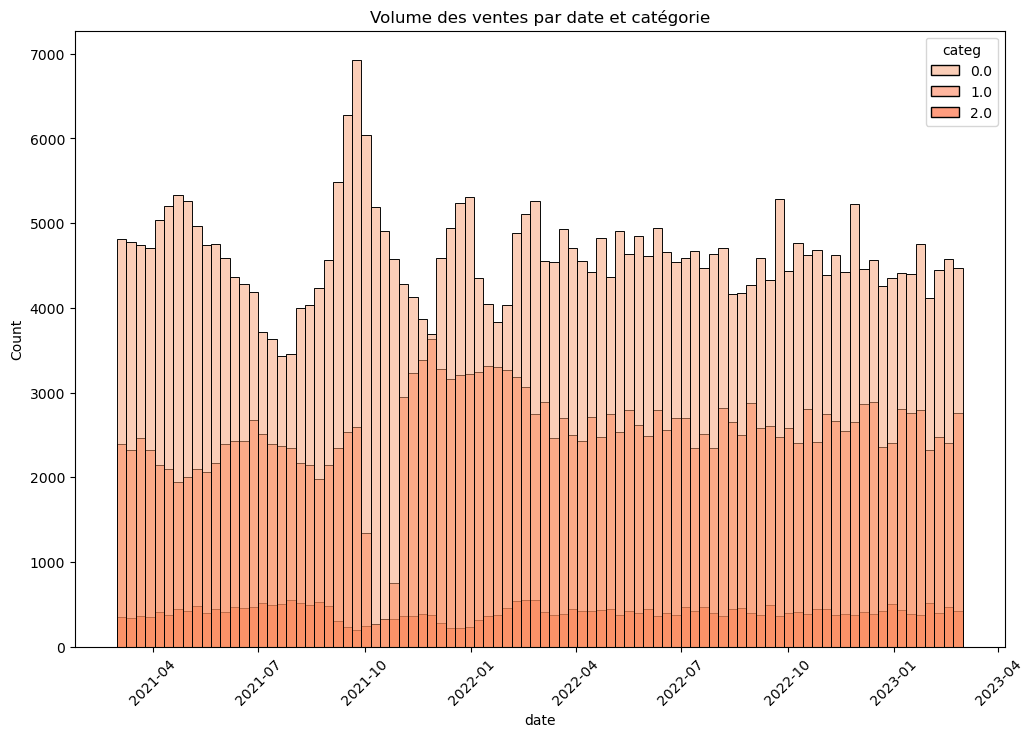

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(data=cust_prod_tran, x='date', hue='categ', palette=["#f99f72", "#ff6e40", "#ff3d00"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie')
print(bold + red + f"\nOn remarque qu'il manque des données pour le mois d'octobre 2021 dans la catégorie 1" + end)
plt.show()

In [35]:
# Regardons plus précisément les dates avec les transactions manquantes du mois octobre
cust_prod_tran_oct = cust_prod_tran[(cust_prod_tran['date']>='2021-10-02') & (cust_prod_tran['date']<='2021-10-28')]
oct_categ_1 = cust_prod_tran_oct[cust_prod_tran_oct['categ'] == 1.0]
oct_categ_1 = oct_categ_1.sort_values(by = 'date',ascending = True)
print(bold + red + f"\nLes données manquantes de la catégorie 1 concernent la période du 02/10/2021 au 28/10/2021 inclus" + end)


Les données manquantes de la catégorie 1 concernent la période du 02/10/2021 au 28/10/2021 inclus


<span style="color:red">**=> Pour éviter tout biais lors de l'analyse, nous effaçons l'ensemble des données du mois d'octobre pour les 3 catégories**</span>

In [36]:
# création d'une nouvelle colonne mois_année
#cust_prod_tran['date'] = pd.to_datetime(lapage['date'])
cust_prod_tran['year_month'] = cust_prod_tran['date'].dt.strftime('%Y-%m')
cust_prod_tran.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,year_month
0,0_528,0.62,0.0,c_6534,f,1999.0,2021-10-03 06:32:48.512716,s_99272,2021-10
1,0_528,0.62,0.0,c_7075,m,1988.0,2021-06-20 20:31:40.948364,s_51439,2021-06
2,0_528,0.62,0.0,c_7075,m,1988.0,2022-06-20 20:31:40.948364,s_226722,2022-06
3,0_528,0.62,0.0,c_5636,f,1989.0,2021-06-24 18:55:00.312636,s_53240,2021-06
4,0_528,0.62,0.0,c_4951,m,1984.0,2021-10-14 11:22:30.187048,s_104606,2021-10


In [37]:
# vérification des données du mois d'octobre avant suppression
print("Nombre d'observations en octobre 2021 :", len(cust_prod_tran[(cust_prod_tran['year_month'] == '2021-10')]))

Nombre d'observations en octobre 2021 : 21606



Après suppression des données du mois d'octobre pour toutes les catégories, 3.18 % des données ont été effacées,
soit 21606 lignes


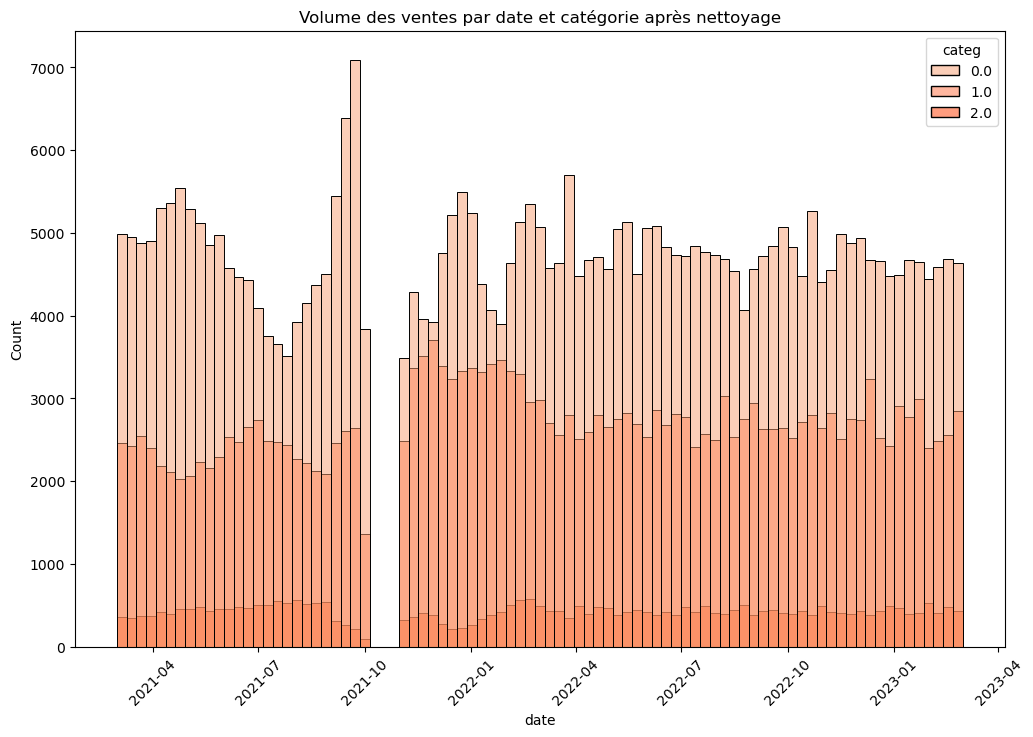

In [38]:
len_df_before = len(cust_prod_tran) # Nombre de lignes avant la suppression du mois d'octobre

cust_prod_tran_oct = cust_prod_tran[(cust_prod_tran['year_month'] =='2021-10')]
cust_prod_tran.drop(cust_prod_tran_oct.index, inplace=True) # Suppression des données du mois d'octobre

# Pourcentage de données effacées après nettoyage
print(bold + red + f"\nAprès suppression des données du mois d'octobre pour toutes les catégories, {round(((len_df_before - len(cust_prod_tran)) / len_df_before * 100), 2)} % des données ont été effacées,\nsoit {len_df_before - len(cust_prod_tran)} lignes" + end)

plt.figure(figsize=(12,8))
sns.histplot(data=cust_prod_tran, x='date', hue='categ', palette=["#f99f72", "#ff6e40", "#ff3d00"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie après nettoyage')
plt.show()

In [39]:
# vérification des données du mois d'octobre après suppression
print("Nombre d'observations en octobre 2021 :", len(cust_prod_tran[(cust_prod_tran['year_month'] == '2021-10')]))

Nombre d'observations en octobre 2021 : 0


In [40]:
# affichage du nombre de lignes et de colonnes
print(cust_prod_tran.shape)

(657726, 9)


<span style="color:red">**=> Après nettoyage et jointure des 3 tables, 657 726 références sont exploitables pour l'analyse**</span>

# **Conclusion** sur les fichiers à l'attention des stakeholders

## ***Résumé des tâches effectuées***

+ **CUSTOMERS** => suppression de 2 identifiants clients test : 'ct_0' et 'ct_1'


+ **PRODUCTS** => 

        1. suppression d'1 identifiant produit test : 'T_0' 
        2. référencement du produit '0_2245' : catégorie (0) et prix (10.32 €)
            
            
+ **TRANSACTIONS** => 
        
        1. suppression de 200 références test
        2. changement du format de la colonne "date" en format datetime
        
+ **CUST_PROD_TRAN** => suppression des données du mois d'octobre 2021 car données manquantes pour la catégorie 1

## ***Données de départ***

In [41]:
print(f" Nombres de références produits dans la table CUSTOMERS : {len(customers)}")
print(f" Nombres de références produits dans la table PRODUCTS : {len(products)}")
print(f" Nombres de références produits dans la table TRANSACTIONS : {len(transactions)}")

 Nombres de références produits dans la table CUSTOMERS : 8621
 Nombres de références produits dans la table PRODUCTS : 3286
 Nombres de références produits dans la table TRANSACTIONS : 679332


Les références manquantes (id_prod '0_2245') ont été complétées, cependant il serait conseillé de vérifier le prix réel du produit '0_2245', car celui-ci étant absent, il a été complété par la médiane des prix de la catégorie 0

# Exportation de la jointure des trois tables vers un fichier CSV

In [42]:
cust_prod_tran.to_csv('src/cust_prod_tran.csv', index=False)